In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
from analsis.analsis_utils.plot_utils import plot_two_metrics, plot_two_metrics_vs_colored_metric, \
    plot_binned_metric_vs_mean_metric, plot_two_metrics_by_ephoc, plot_two_metrics_with_mean, \
    plot_two_metrics_with_mean_multi_ep, plot_two_metrics_by_ephoc, plot_two_ann_metrics_train_test, \
    plot_two_ann_metrics_begining_end, plot_mean_r2_bars, plot_hist_of_performances_by_ephoc
import joblib
from itertools import combinations

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]
blues = ["#0d88e6", "#8ECDDD", "#22668D", ]


In [2]:
results_path = "/Volumes/noamaz/modularity/retina_xor/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

task = "retina"
num_layers = '3'
dim1, dim2 = [3, 4]
dims = [6, 3, 4, 2]

time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"retina_{num_layers}_layers_{dim1}_{dim2}"
plot_path = f"{local_base_path}/plots/for_poster/{res_folder}"

In [4]:
first_analsis_res_folder = f"{results_path}/{res_folder}/first_analysis_results"
first_analsis_file_name = f"2023-09-04-10-45-12_all_results_from_teach_archs_results_with_motifs_10000_ep.csv"
lgbm_folder_name = 'exp_2023-09-12-20-38-43_nice_features'


In [5]:
first_analsis = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}").rename(
    columns={'connectivity_ratio': 'density',
             }).sort_values('mean_performance', ascending=False)


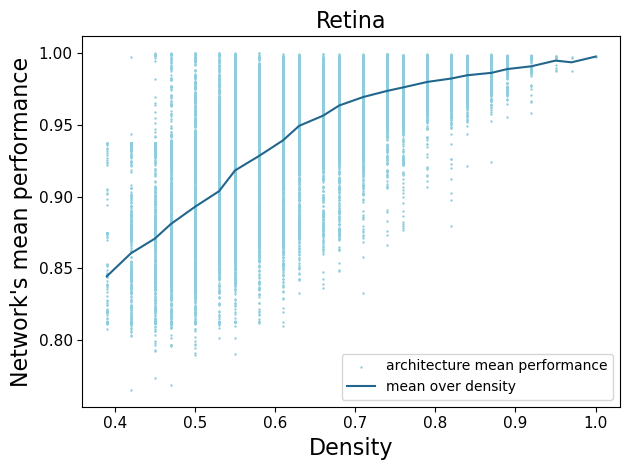

In [21]:

x_metric_name = 'density'
y_metric_name = 'mean_performance'

x_data = first_analsis[x_metric_name]
means_y = []
mean_x = []
for x in sorted(first_analsis[x_metric_name].unique()):
    means_y.append(first_analsis[y_metric_name][x_data == x].mean())
    mean_x.append(x)
#x_data = x_data + np.random.normal(-0.008, 0.008, x_data.shape[0])
plt.scatter(x_data, first_analsis[y_metric_name], c=blues[1], s=0.5, label='architecture mean performance')

plt.plot(mean_x, means_y, c=blues[2], label='mean over density')
plt.legend()
plt.ylabel("Network's mean performance", fontsize=16)
plt.xlabel('Density', fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.title(
    f"{task.capitalize()}",
    wrap=True, fontsize=16)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{y_metric_name}_vs_{x_metric_name}.png")
plt.show()

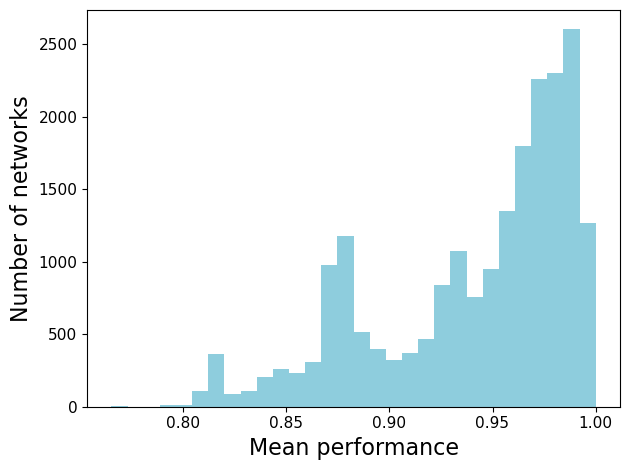

In [20]:
plt.hist(first_analsis['mean_performance'], color=blues[1], bins=30)
plt.xlabel('Mean performance',fontsize=16)
plt.ylabel('Number of networks', fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
#plt.title(f"{task.capitalize()}", fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_mean_performance_hist.png")
plt.show()

In [23]:
lgb_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
lgb_res_nn_path = f"{lgb_res_path}/teach_archs_regression_feature_selection_results"

In [24]:
res = pd.read_csv(f"{lgb_res_path}/6_feature_values.csv").drop("Unnamed: 0", axis=1)

In [25]:
selected_feature_names = list(res.columns)[:-1]

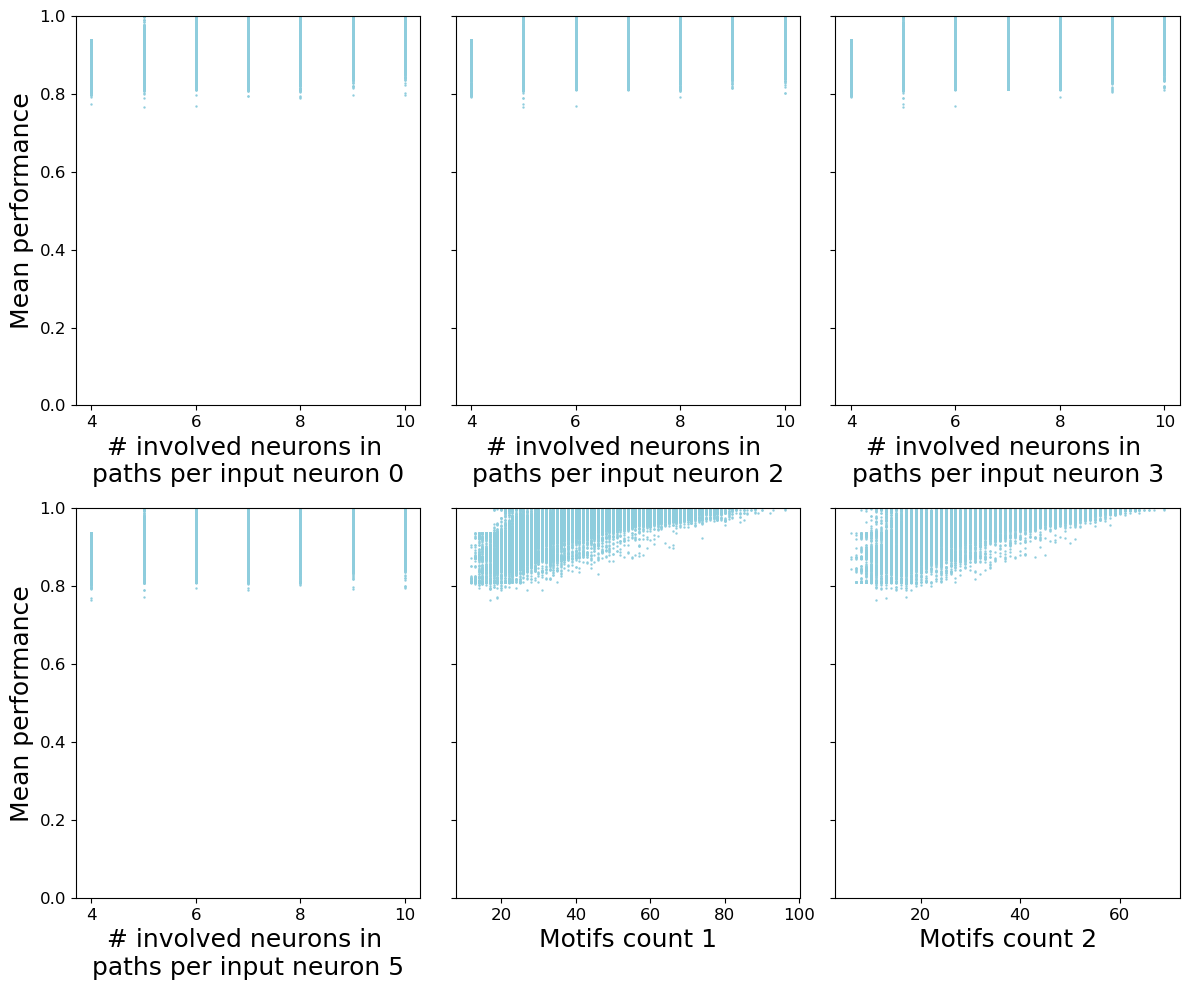

In [26]:
num_columns = int(np.ceil(len(selected_feature_names) / 3))
fig, axs = plt.subplots(num_columns, 3, figsize=(12, 10), sharey='all')
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (f_name, (i, j)) in enumerate(zip(selected_feature_names, idxs)):
    x_data = res[f_name]
    # if  len(set(res[f_name])) < 15:
    #     x_data = x_data + np.random.normal(-0.1, 0.1, len(x_data))
    axs[i, j].scatter(x_data, res['label'], color=blues[1], s=0.5)
    if 'per_input' in f_name:
        neuron = f_name.split('(')[1].split(' ')[1].split(')')[0]
        f_name = f_name.split('(')[0].replace('num', '#') + neuron
    if len(f_name) > 40:
        name = f"{f_name.replace('_', ' ')[:22]}\n{f_name.replace('_', ' ')[22:]}"
    else:
        name = f"{f_name.replace('_', ' ')}"
    axs[i, j].set_xlabel(f"{name.capitalize()}",  fontsize=18)
    axs[i, j].set_ylim(0,1)
    axs[i, j].tick_params(axis='x', labelsize=12)
    axs[i, j].tick_params(axis='y', labelsize=12)
axs[1, 0].set_ylabel(f"Mean performance", fontsize=18)
axs[0, 0].set_ylabel(f"Mean performance", fontsize=18)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_six_fetaures_dist.png")


In [11]:

for file in os.listdir(f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"):
    if 'feature_selectio' in file:
        feature_selection = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}")
lgb_res_nn_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/teach_archs_regression_feature_selection_results_500ep_best"
num_features = []
res = pd.DataFrame()
for file_name in os.listdir(lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    res = pd.concat([res, temp], ignore_index=True)
res = res.sort_values('num_features')

In [12]:
res_to_plot =  res
res

,Unnamed: 0,best ephoc,best mape train,best mape test,best mse train,best mse test,best r2 train,best r2 test,num_features
10,0,253,0.031167,0.026513,0.000037,0.000033,0.407033,0.520124,1
9,0,210,0.027853,0.024154,0.000033,0.000030,0.515733,0.593088,2
4,0,370,0.024614,0.023634,0.000030,0.000030,0.599119,0.610641,3
3,0,454,0.023502,0.021953,0.000029,0.000028,0.636165,0.655690,4
2,0,409,0.024562,0.021017,0.000029,0.000027,0.617064,0.678898,5
1,0,449,0.019651,0.019049,0.000024,0.000025,0.738508,0.721582,6
5,0,430,0.018374,0.017794,0.000023,0.000023,0.775175,0.760105,7
13,0,476,0.016783,0.017889,0.000021,0.000023,0.812188,0.763960,8
15,0,462,0.016791,0.016747,0.000020,0.000021,0.817315,0.797880,9
6,0,489,0.015352,0.015934,0.000019,0.000020,0.842371,0.814522,10


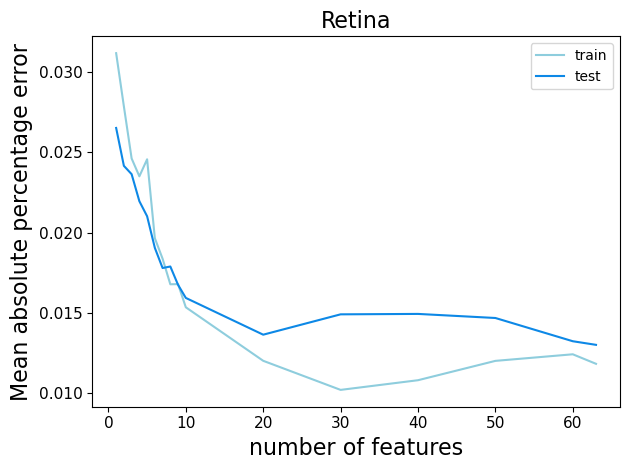

In [19]:
plt.plot(res_to_plot['num_features'], res_to_plot['best mape train'], label='train',c=blues[1])
plt.plot(res_to_plot['num_features'], res_to_plot['best mape test'], label='test',c=blues[0])

plt.xlabel('number of features',  fontsize=16)
plt.ylabel(f'Mean absolute percentage error',  fontsize=16)
plt.legend()
plt.title(
    f"{task.capitalize()}",
    wrap=True, fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

In [15]:
model_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/6_prediction_results.csv"
res = pd.read_csv(model_res_path)


In [16]:
res.shape

(2113, 3)

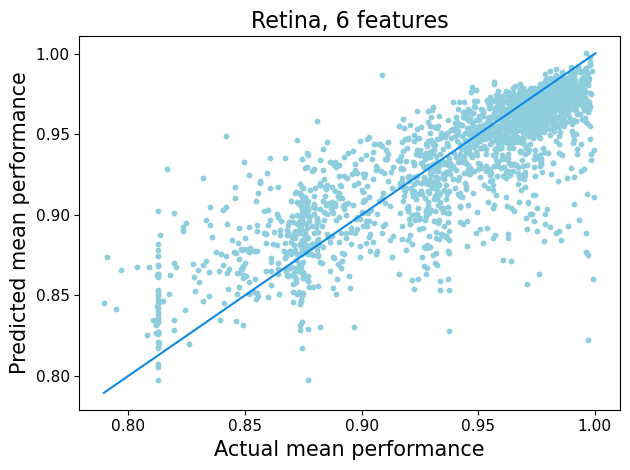

In [18]:
plt.scatter(res['test_label'], res['test_pred'], s=10, c=blues[1])
start = min(res['test_label'].min(), res['test_pred'].min())
stop = max(res['test_label'].max(), res['test_pred'].max())
plt.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=blues[0])
plt.ylabel('Predicted mean performance',  fontsize=15)
plt.xlabel('Actual mean performance',   fontsize=15)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.title(
    f"{task.capitalize()}, 6 features",
    wrap=True, fontsize=16)
plt.tight_layout()
plt.savefig(f"{plot_path}/{time_str}_nn_model_pred_vs_actual.png")
plt.show()